In [2]:
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import linear_timeseries, gaussian_timeseries

## Instantiating some TS

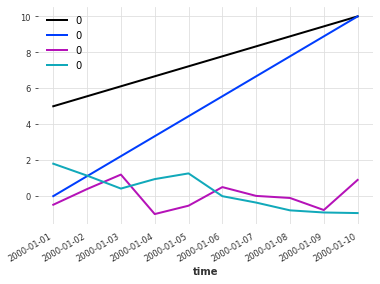

In [4]:
target_series_1 = linear_timeseries(5, 10, 10)
target_series_2 = linear_timeseries(0, 10, 10)
covariate_1 = gaussian_timeseries(10)
covariate_2 = gaussian_timeseries(10)
target_series_1.plot()
target_series_2.plot()
covariate_1.plot()
covariate_2.plot()

## Usage 1: normalizing everything "together"

All the TimeSeries are scaled separately, so we can easily pass everything to the scaler. Each TS will be scaled and transformed with different (min, max) params. The result will be that every TS lies between min and max, in this case, 0 and 1.

[None, None, None, None]

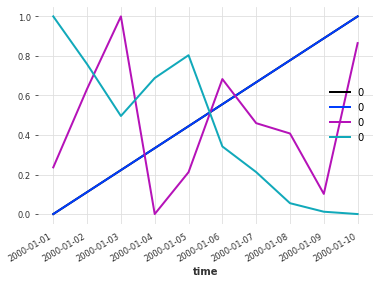

In [5]:
scaler = Scaler()
series = [target_series_1, target_series_2, covariate_1, covariate_2]
scaled_series = scaler.fit_transform(series)
[series.plot() for series in scaled_series]

## .. but the same results is obtained also with two Scalers
Due to the per TS approch, we can use two different Scalers instead of passing target series and covariates to the same Scaler. The results will

[None, None]

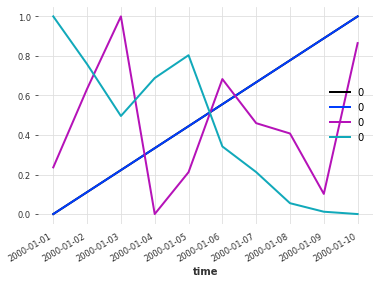

In [6]:
scaler_target = Scaler()
scaler_covariates = Scaler()
target_series = [target_series_1, target_series_2]
covariate_series = [covariate_1, covariate_2]

scaled_target_series = scaler_target.fit_transform(target_series)
scaled_covariates = scaler_covariates.fit_transform(covariate_series)

[series.plot() for series in scaled_target_series]
[series.plot() for series in scaled_covariates]

## Usage 2: train on one series, transform more than one

On the other side, we could also train on a SINGLE TS and then use that Scaler for scaling the other TS. In this case, we have no guarantees that the TS we are transforming (apart from the one used for training), will lie between 0 and 1. Note that the Scaler fitted on a single TS can transform a single TS at a time.

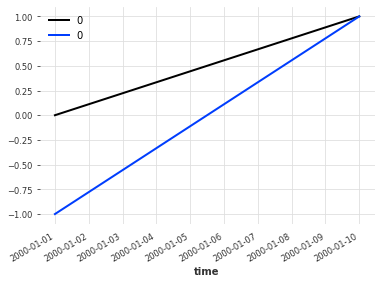

In [30]:
scaler_target = Scaler()
scaler_covariate = Scaler()

scaler_target.fit(target_series_1)

target_series_1_scaled = scaler_target.transform(target_series_1)
target_series_2_scaled = scaler_target.transform(target_series_2)

target_series_1_scaled.plot()
target_series_2_scaled.plot()

### NOTE: you cannot train on several TS and transform a single one
Since, as explained before, when passing multiple TS,the Scaler is fitting and transforming each TS separately, the same number of TS must be passed during both fitting and transforming phases. This behaviour is useful, for instance, when splitting each TS in a training and test parts. In this way the scaler will learn the parameter on the training part of the TS, and can be applied for transforming the test part to, to correctly evaluate your learning process without overfitting.